In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [49]:
us_data_path = '/Users/talhajamal/Documents/Documents/Imperial/Courses/Semester 2/Empirical Finance/IndividualProject/coursework_1/Data_coursework_1.xlsx'
us_data = pd.read_excel(us_data_path)
us_data['Date'] = pd.to_datetime(us_data['Date'], dayfirst=True)
us_data

,Date,Stock Index,Short-term Yield,Long-term Yield
0,1792-01-31,2.348990,3.956,3.956
1,1792-02-29,2.496140,4.198,4.198
2,1792-03-31,2.297596,4.940,4.940
3,1792-04-30,2.350072,5.143,5.143
4,1792-05-31,2.562141,4.557,4.557
...,...,...,...,...
2780,2023-09-30,4507.660000,5.550,4.590
2781,2023-10-31,4288.050000,5.590,4.880
2782,2023-11-30,4193.800000,5.450,4.370
2783,2023-12-31,4567.800000,5.400,3.880


In [50]:
def plot_ts(dataframe, x:str, y:str, label:str, x_axis:str, y_axis:str, title:str):
    plt.figure(figsize=(12, 4))
    plt.plot(dataframe[x], dataframe[y], label=label)
    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

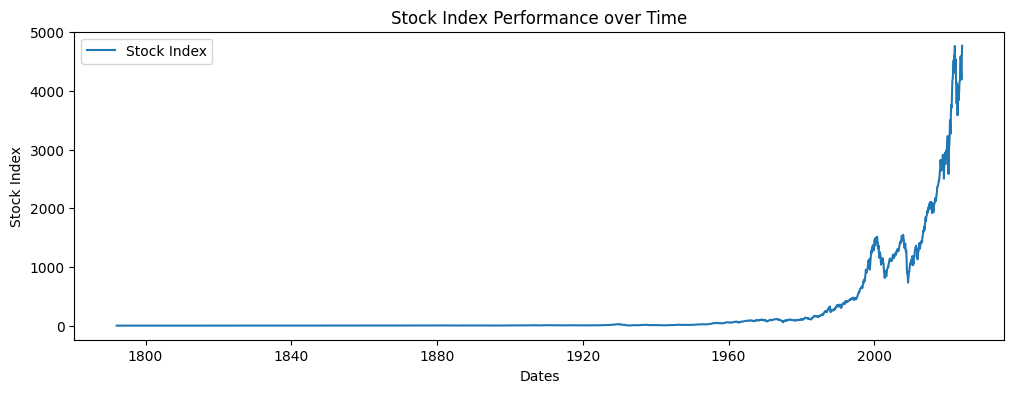

In [51]:
plot_ts(us_data, 'Date', 'Stock Index', 'Stock Index','Dates', 'Stock Index', 'Stock Index Performance over Time')

### Comments:
1. Stock Index Flat from 1800 - 1970.
2. Rise in Stock Market started around 70s when the Fiat Currency was perhaps introduced. 
3. Meteoric rise in Stock Market over the last 50 years. 

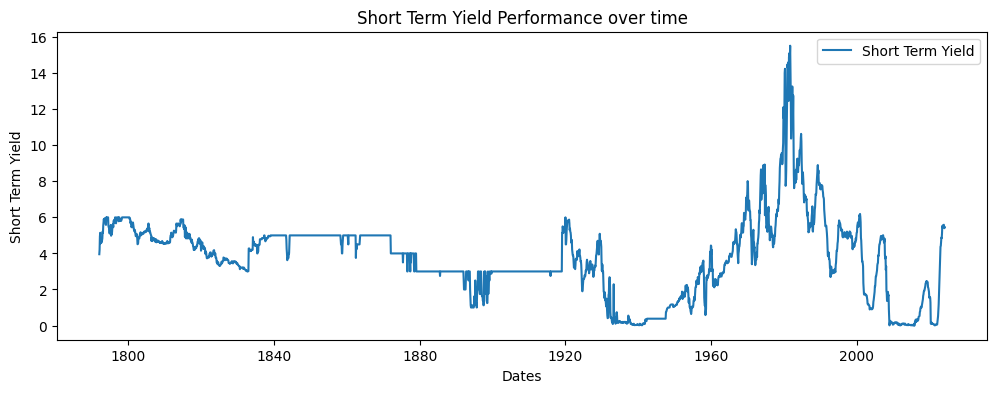

In [56]:
plot_ts(dataframe=us_data, 
        x='Date', 
        y='Short-term Yield', 
        label='Short Term Yield', 
        x_axis='Dates', 
        y_axis='Short Term Yield', 
        title='Short Term Yield Performance over time')

### Comments:
1. Short Term Yields have largely been flat at around a mean of 3%. 
2. Rise in Short Term Rates perhaps every time there is an inflationary environment.  

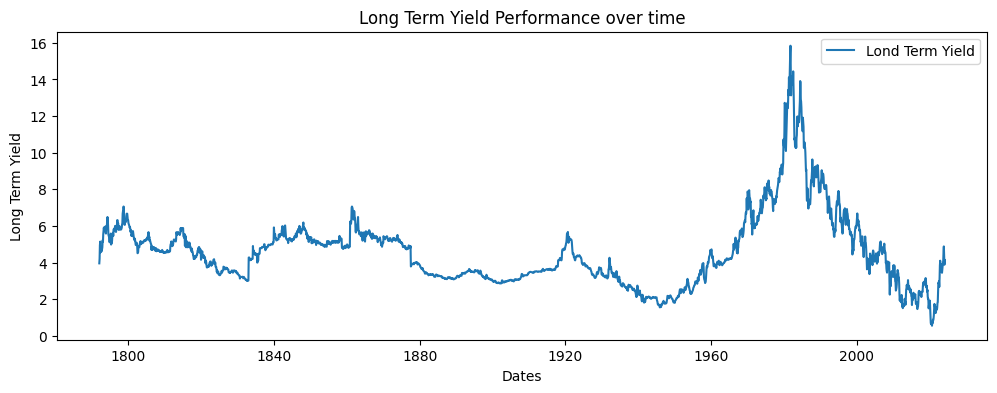

In [53]:
plot_ts(dataframe=us_data, 
        x='Date', 
        y='Long-term Yield', 
        label='Lond Term Yield', 
        x_axis='Dates', 
        y_axis='Long Term Yield', 
        title='Long Term Yield Performance over time')

### Comments:
1. Long Term Yield less volatile than Short Term Yield. 
2. Larger than Short Term Yields mostly because of inherent risk and liquidity premium in longer term treasuries. 

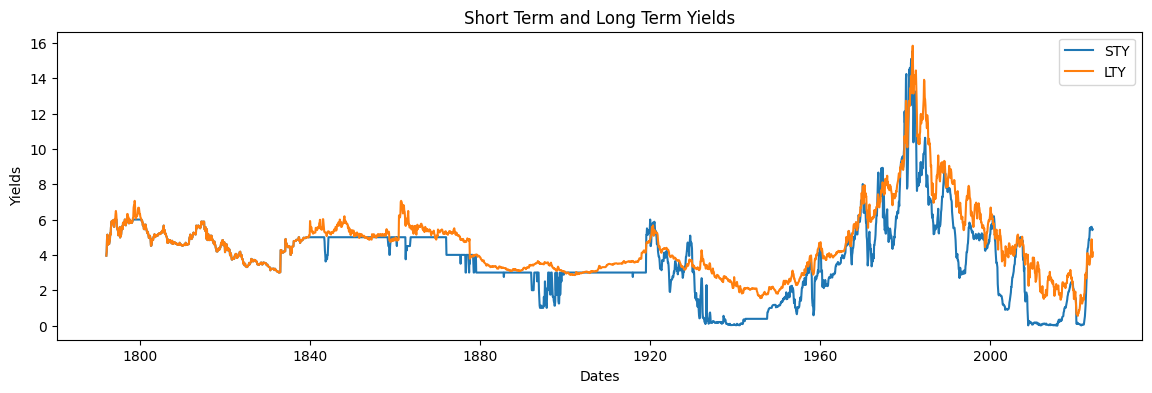

In [61]:
plt.figure(figsize=(14, 4))
plt.plot(us_data['Date'], us_data['Short-term Yield'], label='STY')
plt.plot(us_data['Date'], us_data['Long-term Yield'], label='LTY')
#plt.plot(us_data['Date'], us_data['Long-term Yield'] - us_data['Short-term Yield'], label='Diff')
plt.xlabel('Dates')
plt.ylabel('Yields')
plt.title("Short Term and Long Term Yields")
plt.legend()
plt.show()

### Comments:
1. Long Term Yields always higher than Short Term Yields
2. Short Term Yields more volatile
3. Short Term Yields almost 'catch up' to Long Term Yields